In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder , MinMaxScaler 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)
plt.style.use('ggplot')
%matplotlib inline



In [41]:
data=pd.read_csv(r"C:\Users\A store\Downloads\archive (2)\insurance.csv")

In [42]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [44]:
total=data.isna().sum().sort_values(ascending=False)
percent=(data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data

,total,percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [47]:
dup=data.duplicated().sum()
data=data.drop([dup],axis=0)

In [52]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [53]:
data.duplicated()

0       False
2       False
3       False
4       False
5       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1337, dtype: bool

In [54]:
data['charges'].describe()

count     1337.000000
mean     13279.057172
std      12110.421289
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

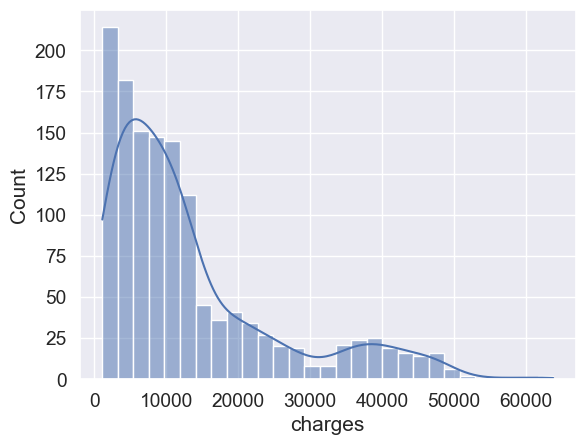

In [55]:
sns.histplot(data=data,x='charges',kde=True)
plt.show()

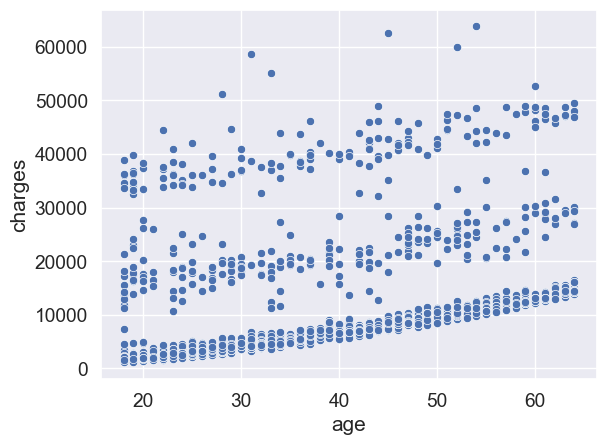

In [56]:
sns.scatterplot(data=data,x='age',y='charges')
plt.show()

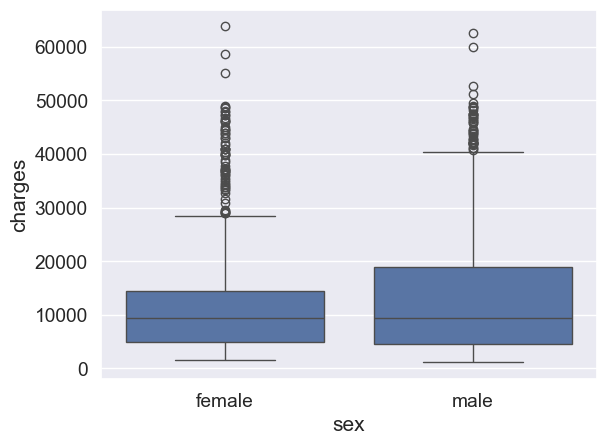

In [57]:
sns.boxplot(data=data,x='sex',y='charges')
plt.show()

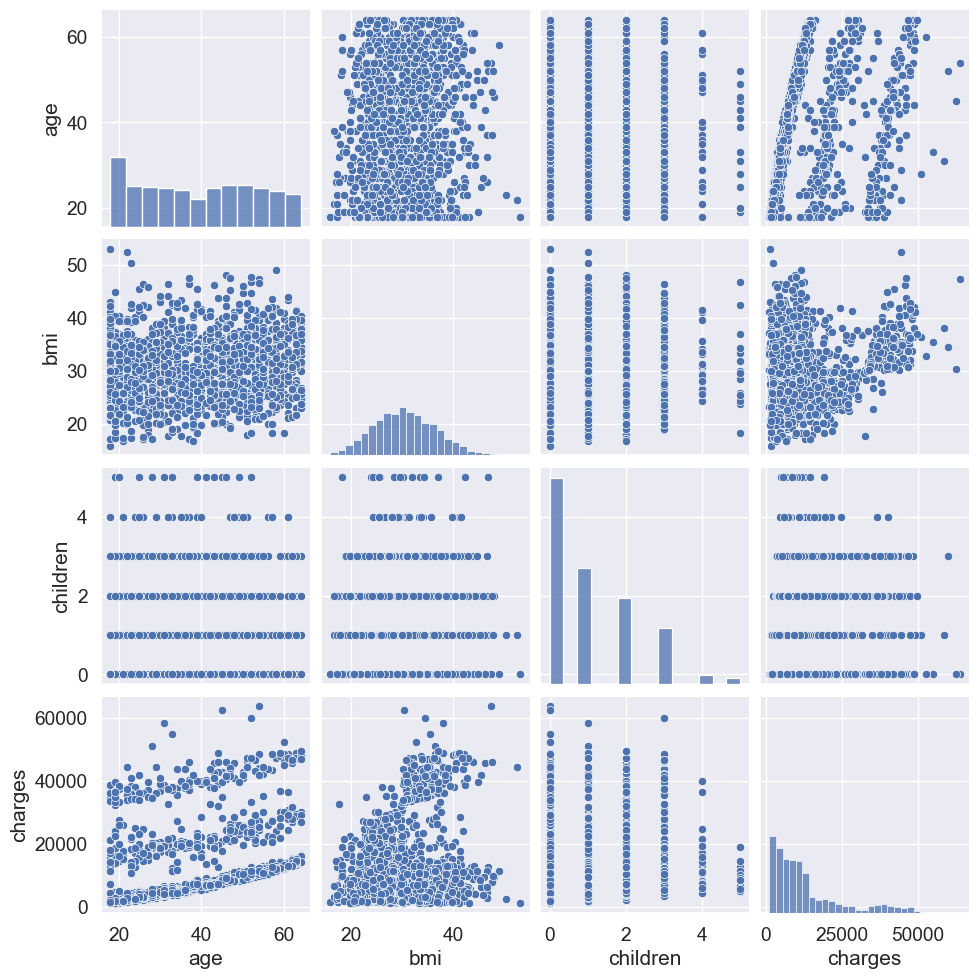

In [58]:
sns.pairplot(data=data)

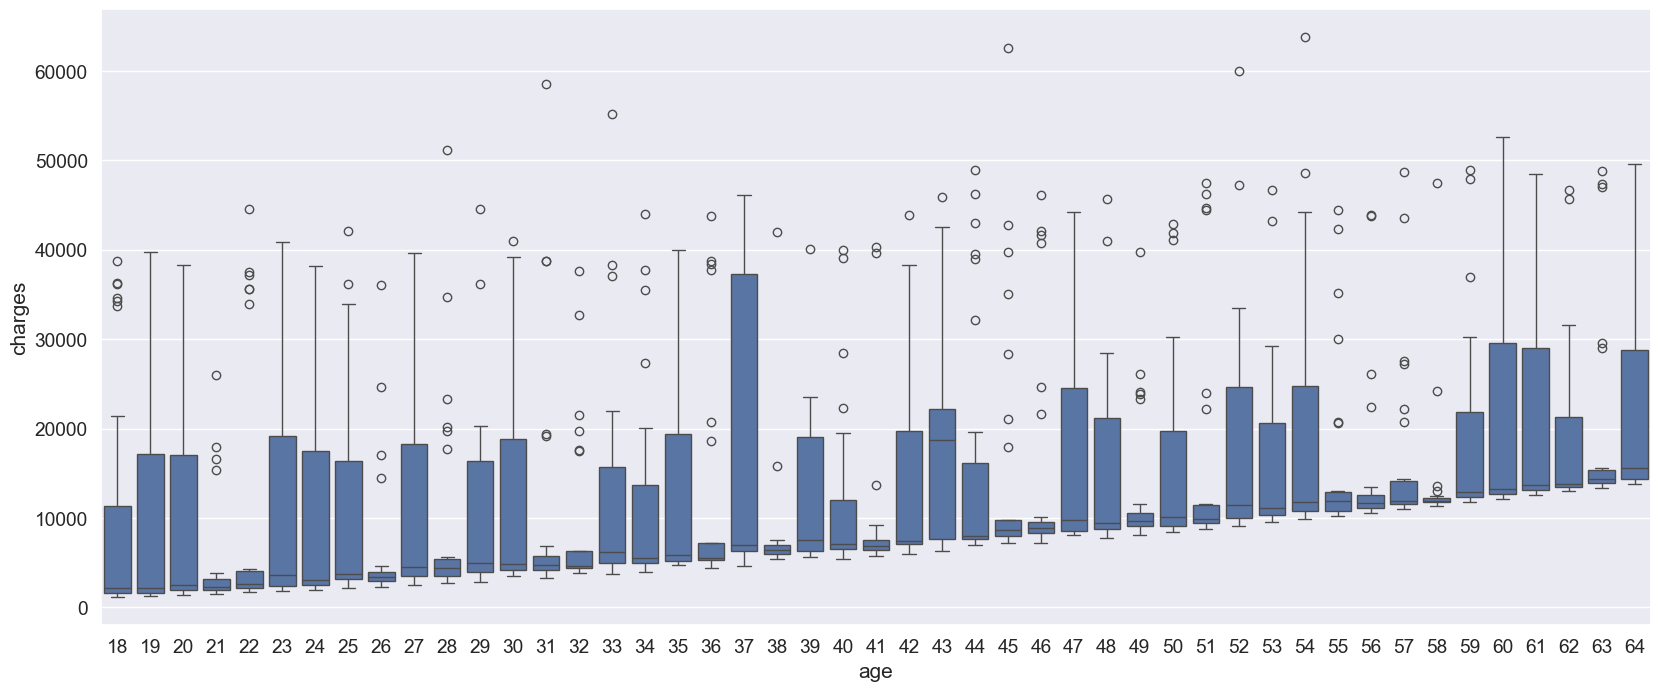

In [59]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data,x='age',y='charges')
plt.show()

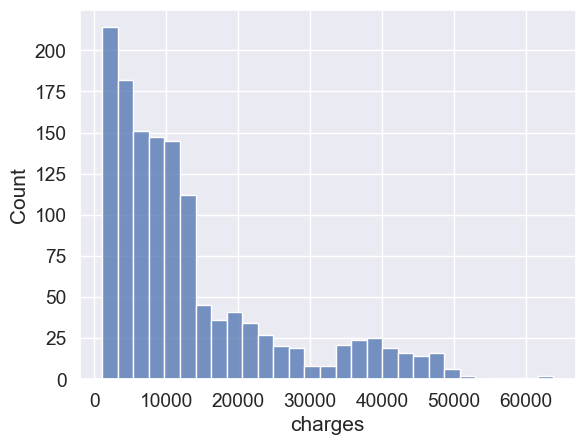

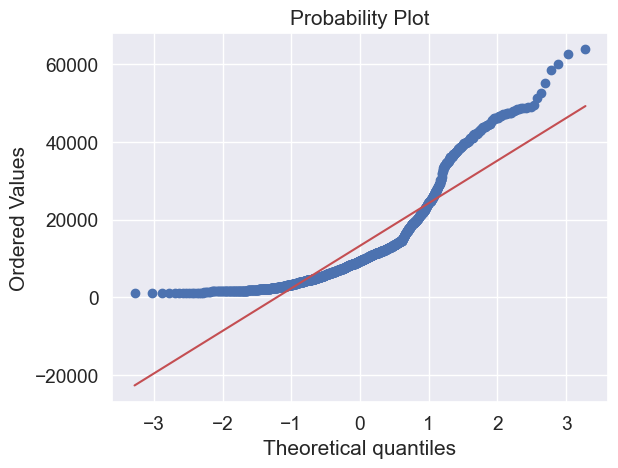

In [60]:
sns.histplot(data=data,x='charges')
plt.figure()
stats.probplot(data['charges'],plot=plt)
plt.show()

In [61]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
data['charges']=np.log(data['charges'])

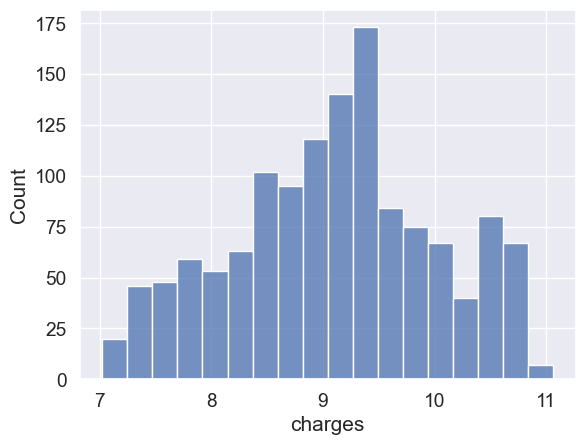

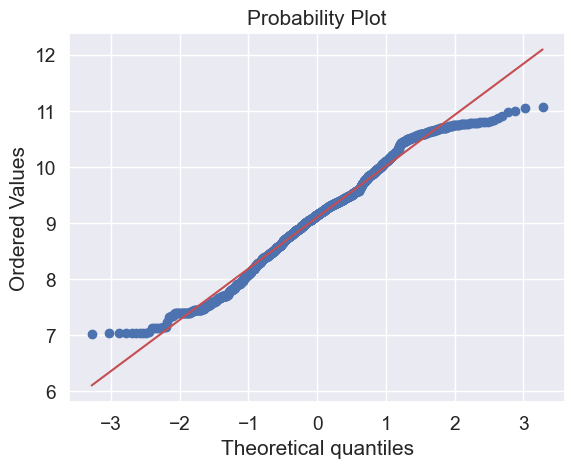

In [63]:
sns.histplot(data=data,x='charges')
plt.figure()
stats.probplot(data['charges'],plot=plt)
plt.show()

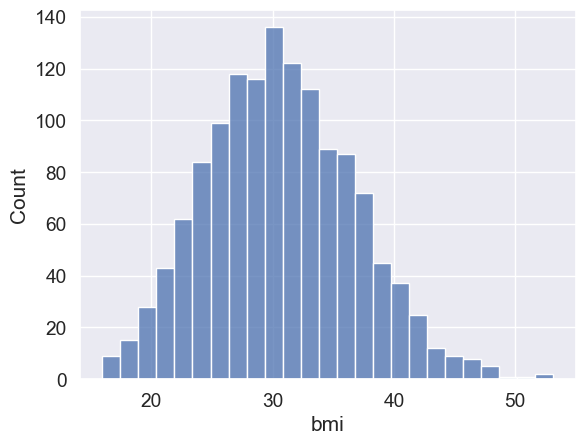

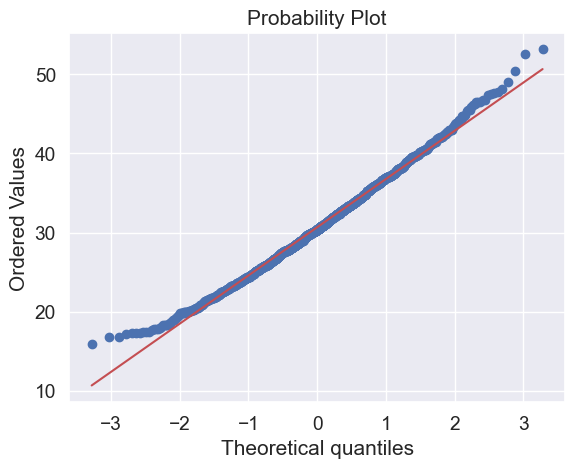

In [64]:
sns.histplot(data=data,x='bmi')
plt.figure()
stats.probplot(data['bmi'],plot=plt)
plt.show()

In [65]:
data=pd.get_dummies(data=data,dtype='int')

In [66]:
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0
5,31,25.740,0,8.231275,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,0,1,1,0,0,1,0,0
1334,18,31.920,0,7.698927,1,0,1,0,1,0,0,0
1335,18,36.850,0,7.396233,1,0,1,0,0,0,1,0
1336,21,25.800,0,7.604867,1,0,1,0,0,0,0,1


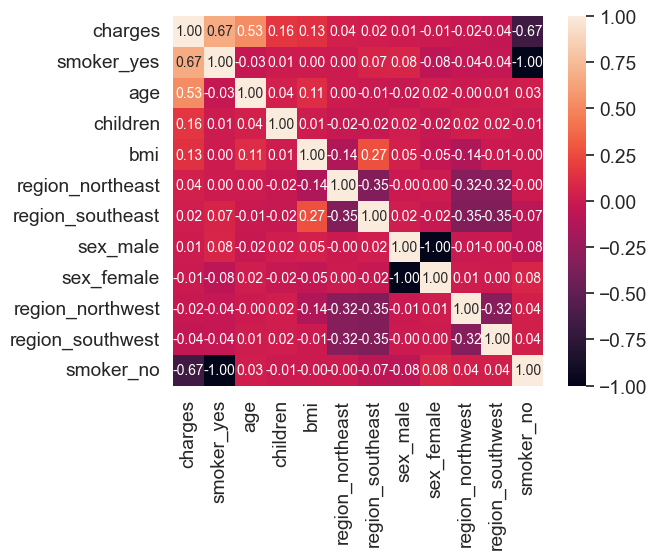

In [67]:
#saleprice correlation matrix
corrmat=data.corr()
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'charges')['charges'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [68]:
data=data.drop(['smoker_no'],axis=1)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1,0,1,0,0,0,1
2,28,33.000,3,8.400538,0,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,0,0,1,0,0
5,31,25.740,0,8.231275,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,0,1,0,0,1,0,0
1334,18,31.920,0,7.698927,1,0,0,1,0,0,0
1335,18,36.850,0,7.396233,1,0,0,0,0,1,0
1336,21,25.800,0,7.604867,1,0,0,0,0,0,1


In [74]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split



In [70]:
X = data.drop('charges', axis=1)
Y = data[['charges']]  

#Initialize Min-Max Scalers for X and Y
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

#Fit and transform the data
X_normalized = scaler_X.fit_transform(X)
Y_normalized = scaler_Y.fit_transform(Y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y_normalized, test_size=0.2, random_state=42)

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred,squared=False))
print("Linear Regression R2:", r2_score(y_test, y_pred))
print('linear regression MAE',mean_absolute_error(y_test,y_pred))

Linear Regression MSE: 0.11040670023375539
Linear Regression R2: 0.7757653925482912
linear regression MAE 0.0686555273549818


In [77]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
print("Random Forest Regressor:", mean_squared_error(y_test, y_pred,squared=False))
print("Random Forest Regressor:", r2_score(y_test, y_pred))
print('Random Forest Regressor',mean_absolute_error(y_test,y_pred))

Random Forest Regressor: 0.0984584805041119
Random Forest Regressor: 0.8216726160600062
Random Forest Regressor 0.04960103764594416


In [78]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
print("Gradient Boosting Regressor:", mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regressor:", r2_score(y_test, y_pred))
print('Gradient Boosting Regressor',mean_absolute_error(y_test,y_pred))

Gradient Boosting Regressor: 0.009070118708022944
Gradient Boosting Regressor: 0.833150560745392
Gradient Boosting Regressor 0.048279922972887246


In [79]:
nn_reg = MLPRegressor(hidden_layer_sizes=(64, 32),  
                      activation='relu',             
                      solver='adam',                 
                      random_state=42, 
                      max_iter=500)
nn_reg.fit(X_train, y_train)
y_pred = nn_reg.predict(X_test)
print("Neural Network Regressor:", mean_squared_error(y_test, y_pred))
print("Neural Network Regressor:", r2_score(y_test, y_pred))
print('Neural Network Regressor',mean_absolute_error(y_test,y_pred))

Neural Network Regressor: 0.010547057175749474
Neural Network Regressor: 0.805981527672456
Neural Network Regressor 0.06447532028480873


In [88]:
Lasso_reg = Ridge(alpha=3)
Lasso_reg.fit(X_train, y_train)
y_pred = Lasso_reg.predict(X_test)
print("Gradient Boosting Regressor:", mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regressor:", r2_score(y_test, y_pred))
print('Gradient Boosting Regressor',mean_absolute_error(y_test,y_pred))

Gradient Boosting Regressor: 0.012276185655753212
Gradient Boosting Regressor: 0.7741733312667572
Gradient Boosting Regressor 0.0693928577164189


In [94]:
Lasso_reg = Lasso(alpha=0.001)
Lasso_reg.fit(X_train, y_train)
y_pred = Lasso_reg.predict(X_test)
print("Gradient Boosting Regressor:", mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regressor:", r2_score(y_test, y_pred))
print('Gradient Boosting Regressor',mean_absolute_error(y_test,y_pred))

Gradient Boosting Regressor: 0.012427910037291986
Gradient Boosting Regressor: 0.7713822842258178
Gradient Boosting Regressor 0.0683416746438141
